The correct initial condition for y2 is: 0.5801454734922438


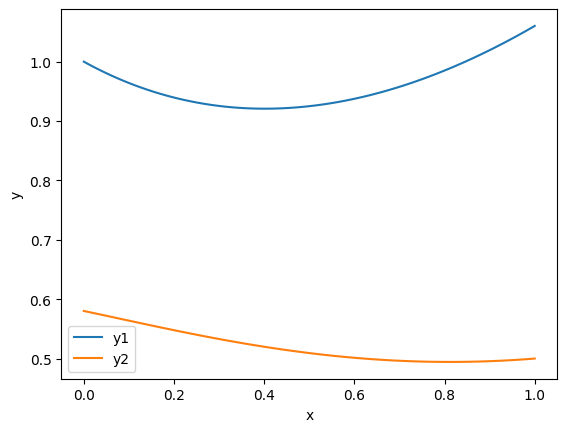

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root_scalar

# Define the system of differential equations
def equations(y, x):
    y1, y2 = y
    dy1dx = -y1 + y2 + x
    dy2dx = y1 - 2*y2
    return [dy1dx, dy2dx]

# Define the initial condition for y1
y10 = 1.0

# Define the terminal condition for y2
y20 = 0.5

# Define the interval of integration
x = np.linspace(0, 1, 100)

# Define the function to integrate the system of differential equations
def integrate(y20_guess):
    y0 = [y10, y20_guess]
    sol = odeint(equations, y0, x)
    return sol[:, 1][-1] - y20

# Use the root_scalar function to find the correct initial condition for y2
sol = root_scalar(integrate, bracket=[-10, 10], method='brentq')

# Print the solution
print("The correct initial condition for y2 is:", sol.root)

# Integrate the system of differential equations with the correct initial condition
y0 = [y10, sol.root]
sol = odeint(equations, y0, x)

# Plot the solution
import matplotlib.pyplot as plt
plt.plot(x, sol[:, 0], label='y1')
plt.plot(x, sol[:, 1], label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
import numpy as np
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

In [3]:
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [4]:
x = np.linspace(0, 1, 5)


In [5]:
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3

In [6]:
from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

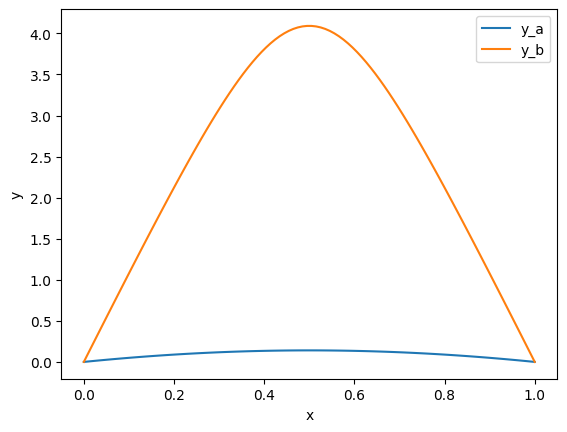

In [7]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [46]:
from MacroModels.ProductionFunctions import CobbDouglas
from Finance.UtilityFunctions import CRRA
import numpy as np
from scipy.integrate import solve_bvp

l0=100
n=0.04
depreciation_rate = 0.1
discounting_rate = 0.08

utility_function = CRRA(params=2)
production_function = CobbDouglas(alpha=0.3)

def labor_function(t):
    return l0*np.exp(n*t)

# Define the function that returns the derivatives
def fun(t, y):
    k, c = y
    l = labor_function(t)

    r = production_function.gradient([k, l])[0] - depreciation_rate # rate of return
    w = production_function.gradient([k, l])[1]  # wage
    e = utility_function.absolute_risk_aversion(c) * c  # elasticity of substitution

    # print(pd.DataFrame({'k': k, 'c': c, 'l': l, 'r': r, 'w': w, 'e': e}))

    dc_dt = (r - discounting_rate) * c / e
    dk_dt = r * k + (w - c) * l

    return [dk_dt, dc_dt]

# Define the boundary conditions
def bc(ya, yb, c_t_max):
    return np.array([ya[0] -100,  # k(0) = 1
                     yb[1] - c_t_max])  # c(T_max) = 1

# Define the initial guess for the solution
def init_guess(t):
    return np.zeros((2, len(t))) + 1.0  # initial guess for k and c

# Define the time points where the solution is desired
T_max = 10
t = np.linspace(0, T_max, 10000)

# Set the value of c(T_max)
c_T_max = 0.0  # or 100.0, or any other value you want

# Solve the boundary value problem
sol = solve_bvp(fun, lambda ya, yb: bc(ya, yb, c_T_max), t, init_guess(t))

# Print the solution at the desired time points
print(sol.sol(t))

C:\Users\leocr\AppData\Local\Temp\ipykernel_25964\68000506.py:24: RuntimeWarning: invalid value encountered in multiply
  e = utility_function.absolute_risk_aversion(c) * c  # elasticity of substitution


[[9.38125000e+01 9.36441392e+01 9.34730817e+01 ... 1.92232738e+01
  1.92894426e+01 1.93532903e+01]
 [3.10205657e+00 3.08975287e+00 3.07757605e+00 ... 6.45315305e-02
  6.35214964e-02 6.25000000e-02]]


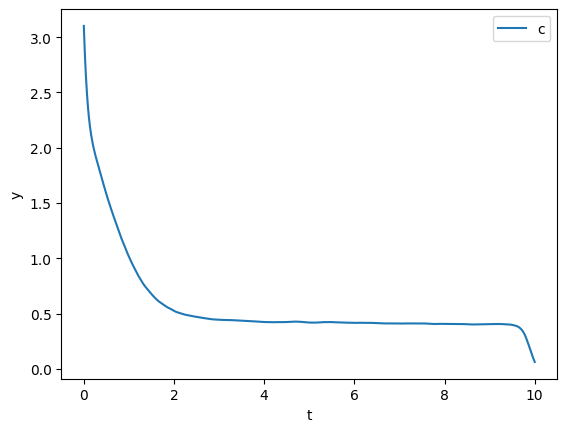

In [47]:
k, c = sol.sol(t)
import matplotlib.pyplot as plt
#plt.plot(t, k, label='k')
plt.plot(t, c, label='c')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()